In [ ]:
<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/Interpolacion_lagrange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import sympy as sy

# Interpolación con series de Taylor:
- la interpolacion con series de Taylor **NO** es una buena forma para realizar ajuste de funciones dado que el error puede variar segun el dominio, Dos ejemplos que relatan lo anterior son descritos a continuación:

# 1.0 Cálculo de la funcion exp(x) con la serie de Taylor:

In [ ]:

f0 = lambda x: 1
f1 = lambda x: 1 + x
f2 = lambda x: 1 + x + x**2/2
f3 = lambda x: 1 + x + x**2/2 + x**3/6
f4 = lambda x: 1 + x + x**2/2 + x**3/6 + x**4/24
f5 = lambda x: 1 + x + x**2/2 + x**3/6 + x**4/24 + x**5/120


In [ ]:
x = np.linspace(-1, 3, 100)

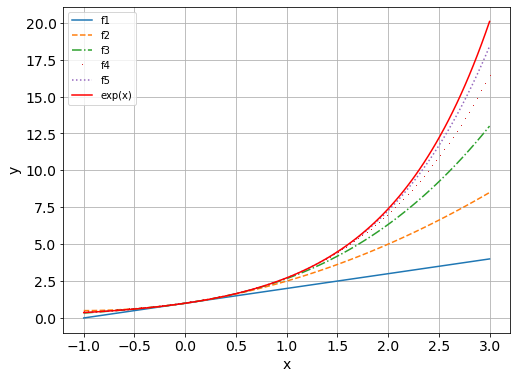

In [ ]:
# Polinomio
size_font = 14
plt.figure(figsize=(8,6))
plt.plot(x, f1(x), "-" , label = "f1")
plt.plot(x, f2(x), "--", label = "f2")
plt.plot(x, f3(x), "-." , label = "f3")
plt.plot(x, f4(x), ",", label = "f4")
plt.plot(x, f5(x), ":", label = "f5")
plt.plot(x, np.exp(x),"r-" , label = "exp(x)")
plt.xlabel("x", fontsize = size_font)
plt.ylabel("y", fontsize = size_font)
plt.xticks(fontsize = size_font)
plt.yticks(fontsize = size_font)
plt.grid()
plt.legend()
plt.show()

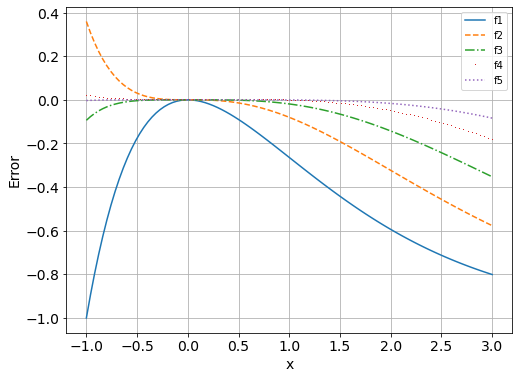

In [ ]:
#Error de la función
f_ref = np.exp(x)
plt.figure(figsize=(8,6))
plt.plot(x, (f1(x) - f_ref)/f_ref, "-" , label = "f1")
plt.plot(x, (f2(x) - f_ref)/f_ref, "--", label = "f2")
plt.plot(x, (f3(x) - f_ref)/f_ref, "-." , label = "f3")
plt.plot(x, (f4(x) - f_ref)/f_ref, ",", label = "f4")
plt.plot(x, (f5(x) - f_ref)/f_ref, ":", label = "f5")
plt.legend()
plt.xlabel("x", fontsize = size_font)
plt.ylabel("Error", fontsize = size_font)
plt.xticks(fontsize = size_font)
plt.yticks(fontsize = size_font)
plt.grid()
plt.show()

## 2 Cálculo de la funcion f(x) = 1/x evaluada en x= 3, con la serie de Taylor:

Una mejor aproximación,  puede ser realizada  de aumentando el orden de la serie de taylor, pero, no neceariamente tenemos una buena aproximación,   con el aumento del orden de la serie de Taylor.
Consideremos la función $f(x)=1/x$ y evaluemos la función en el punto x = 3. Recordemos que la serie de Taylor de una función viene dada por:

\begin{equation}
f(x) = \sum_{n = 0}^{\infty} \frac{\mathrm{d}^n f(a)}{\mathrm{d}x^n}(x-a)^n
\end{equation}

Las primeras derivadas de la función vienen dadas por:  $f(x)=x^{-1}$, $f'(x)=-x^{-2}$, $f''(x)= (-1)^2 2 x^{-3}$ ... $f^{k}(x)=(-1)^{k}k!x^{-k-1}$


La serie de Taylor,  para esta función puede ser escrita como:

\begin{equation}
P_n(x) = \sum_{k = 0}^{n} \frac{f^{k}(1)}{k!}(x-1)^k = \sum_{k = 0}^{n} (-1)^{k}(x - 1)^k
\end{equation}




In [ ]:
P = lambda x: (-1)**k*( x - 1)**k
Pexact = lambda x: 1/x

In [ ]:
_PN = np.zeros(10) #!0 primeros valores del polinomio
_PN[0] = 1
for i in range (1, len(_PN)):
  k = i
  _PN[i] = P(3) + _PN[ i - 1]


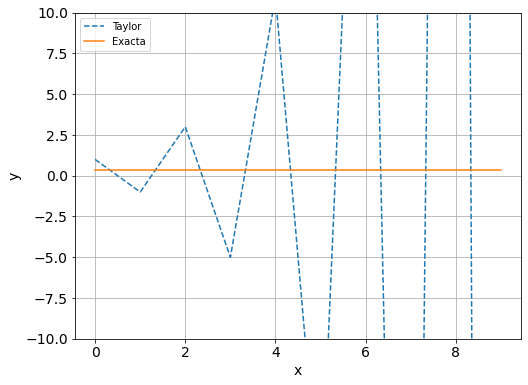

In [ ]:
f_ref = np.exp(x)
plt.figure(figsize=(8,6))
plt.plot(_PN,"--", label = "Taylor")
plt.plot(np.ones(10)*Pexact(3), label ="Exacta")
plt.legend()
plt.xlabel("x", fontsize = size_font)
plt.ylabel("y", fontsize = size_font)
plt.xticks(fontsize = size_font)
plt.yticks(fontsize = size_font)
plt.ylim(-10,10)
plt.grid()
plt.show()



La razon anterior es necesaria para entender que realizar una aproximación con series de Taylor alrededor de un punto no implica un buena aproximación, por eso, son necesarios algunos metodos para poder realizar el ajuste correcto.

# Interpolación con polinomios de lagrange

El polinomio de lagrange, es una combinación lineal de polinomios,
multiplicada por la función evaluada en un $x_n$.

La interpolacion de lagrange, garantiza que la funcion pasa por los puntos que se desean interpolar.

\begin{equation}
L_j(x) = \prod_{i=0\\i\neq j}^{n} \frac{x-x_i}{x_j-x_i}
\end{equation}

\begin{equation}
P(x)= \sum_{k=0} ^{n} f(x_k)L_k(x)
\end{equation}


El error dado por este metodo, viene dado por:
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}




Ejemplo:  Dados los puntos:

_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])

fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

Encontar un ajuste a através del polinomio de lagrange:

In [ ]:
_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
#Esta rutina determina el polinomio de lagrange
#Polinomio de lagrange de orden j
x = sy.symbols("x")

def Lagrange_j( xi, xj, n ):
  x = sy.symbols("x")
  _L = 1
  for i in range(0, n):
    if(xi[i] == xj):
      continue
    else:
      num = x - xi[i]
      den = xj - xi[i]
      _L = num *_L / den
  return _L

In [ ]:
from sympy import init_printing
init_printing() ##Latex
pp = Lagrange_j( _x, _x[0], 5 ) #Lagrange de orden n= 5


In [ ]:
pp

In [ ]:
poly = lambda xstar: Lagrange_j( _x, xstar, 5 ) #Funcion para evaluar el polinomo de lagrange L (x*)

In [ ]:
#Construimos el polinomio para los datos dados:
f = fx[0]*Lagrange_j(_x, _x[0], 5)
for i in range(1, 5):

  f = fx[i] * Lagrange_j(_x, _x[i], 5) + f  #Construccion del polinomio final
poli = sy.simplify(f) #Simplificacion del polinomio
print(poli)

0.00182510288066506*x**4 + 0.0552927983538751*x**3 - 0.343046604938195*x**2 + 0.0733913477365888*x + 0.977735055967113


In [ ]:
#Evaluemos el polinomio para x entre 0, 4
value_x = np.linspace(0, 4, 100)
p1 = np.zeros(100)
for i in range(0, len(value_x)):
  p1[i] = f.subs(x,value_x[i]) #Variable x, evaluacion del polinomio en los valores definidos por value_x empleando sympy

In [ ]:
fxn = sy.lambdify(x,f,'numpy')# Otra forma de evaular el polinomio, Transformar el polinomio para que la ejecución sea más rápida, analoga a p1

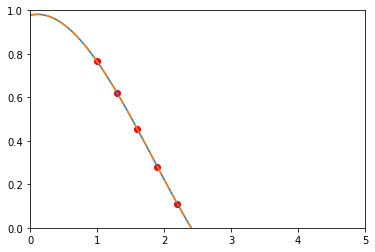

In [ ]:
#Grafica de la funcion
plt.plot()
plt.plot(_x, fx, "ro")
plt.plot(value_x, p1, "-")
plt.plot(value_x, fxn(value_x), "-.")
plt.xlim(0, 5)
plt.ylim(0, 1)
plt.show()

In [ ]:
#A traves de las librerias de scipy, interpolemos los datos anteriores:
from scipy.interpolate import lagrange
_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
fx =  np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])
poly = lagrange(_x, fx)

In [ ]:
poly(1.5)

In [ ]:
value_x = np.linspace(0, 4, 100)
#def polinomio():
value = poly[0]*1.5**0 + poly[1]*1.5**1 + poly[2]*1.5**2 + poly[3]*1.5**3 + poly[4]*1.5**4
print(value)

0.5118199942387228


In [ ]:
def y_caida(H, g, t ):
  return (H - 0.5*g*t**2)
t = np.linspace(0,10, 6)
y = y_caida(50, 9.8, t)

print(t)
print(y)


[ 0.  2.  4.  6.  8. 10.]
[  50.    30.4  -28.4 -126.4 -263.6 -440. ]


In [ ]:
x = sy.symbols("x")
p_ = x*2 + x - x/x
print(p_.subs(x, 1))

prapida = sy.lambdify(x,p_,'numpy')
print(prapida(1))

2
2


REF
[1]http://users.df.uba.ar/dmitnik/metodosnumericos/lagrange/lagrange.html
[2]https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.lagrange.html
[3]

# Diferencias divididas



In [ ]:
import numpy as np
import matplotlib.pylab as plt
_x =  np.array([1, 1.3, 1.6, 1.9, 2.2])
y = fx = np.array([0.7651977,0.6200860, 0.4554022, 0.2818186, 0.1103623])

In [ ]:
#Calculo de las diferencias de orden n
def divides_diferences(_x, fx, j, k):

  m = np.zeros(len(fx) - 1)
  for i in range(0, len(fx) - 1):
    m_num = fx[i + 1] - fx[i]
    m_den = _x[j + 1] - _x[k]
    j = j + 1
    k = k + 1
    m[i] = m_num / m_den
  return m


order = len(_x) - 1
coef = np.zeros(order +1)
coef[0] = fx[0]


#Calculo de todas las diferencias divididas.
for j in range( 0, order):

  fx = divides_diferences(_x, fx, j, 0)

  coef[j+1] = fx[0]
  #print(fx)

print(coef)

[ 0.7651977  -0.48370567 -0.10873389  0.0658784   0.0018251 ]


In [ ]:
#Construccion del polinomio

prod = 1
Px =  0
lis = []
for j in range(1, len(coef) ):
  prod = (x -_x[j-1])*prod
  Px = (prod*coef[j] + Px)
  lis.append(Px)
Px = Px + coef[0]
print(lis[2])

-0.483705666666666*x + 0.0658783950617283*(x - 1.6)*(x - 1.3)*(x - 1.0) - 0.108733888888889*(x - 1.3)*(x - 1.0) + 0.483705666666666


In [ ]:
print(Px.subs(x, 1.5))

0.511819994238683


In [ ]:
#Datos para graficacion
value_x = np.linspace(0, 10, 100)
p1 = np.zeros(100)

for i in range(0, len(value_x)):
  p1[i] = Px.subs(x,value_x[i]) #Variable x, evaluacion del polinomio en los valores definidos por value_x



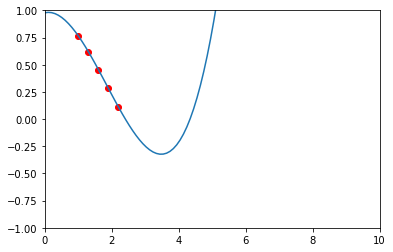

In [ ]:
plt.figure()
plt.plot(_x, y, "ro")
plt.plot(value_x, p1, "-")
#plt.plot(value_x, fxn(value_x), "-.")
plt.xlim(0, 10)
plt.ylim(-1, 1)
plt.show()